In [176]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (177, 284, 3)


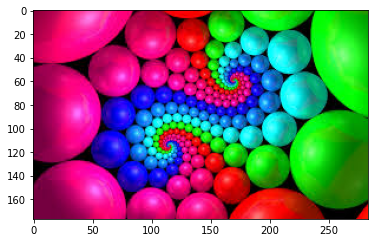

In [177]:
#Opencv to read image
image_main = 'colorfull.jfif'
image = cv2.imread(image_main)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

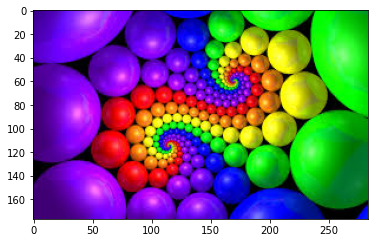

In [178]:
#image is converted into Blue Green Red (BGR) to Red Green Blue (RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

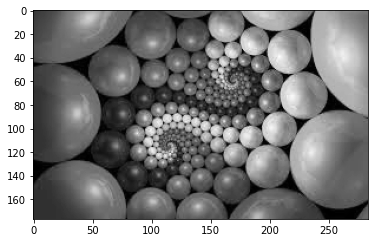

In [179]:
#image is converted into Blue Green Red (BGR) to Gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

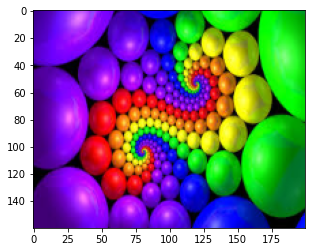

In [180]:
resized_image = cv2.resize(image, (200, 160))
plt.imshow(resized_image)

In [181]:
#function to covert RGB to Hex decimal
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [182]:
#function to get image from source
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [183]:
#this function give chart of color ,number of color from image 
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (200, 160), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 71.99524534,   3.19189806, 158.0517307 ]),
 array([ 10.15956509, 142.46723479,  20.37055539]),
 array([201.75809717, 189.18243927,  20.18319838]),
 array([199.64877443,  30.26528079,  22.49798325]),
 array([143.70687646,  17.64452214, 244.77753497]),
 array([ 24.29407909, 239.01638628,  26.31439808]),
 array([21.0736465 , 13.08200637, 19.13097134]),
 array([ 14.48349163,  14.46585256, 225.70375396])]

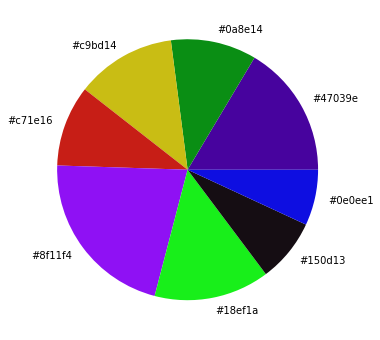

In [184]:

get_colors(get_image(image_main), 8, True)

In [185]:
#import image from os
IMAGE_DIRECTORY = 'image'
COLORS = {
    'GREEN': [0, 255, 0],
    'BLUE': [0,0,255],
    
    'YELLOW':[255,255,0],
    'RED':[255,0,0],
    'LIGHT BLUE':[0,255,255],
    
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

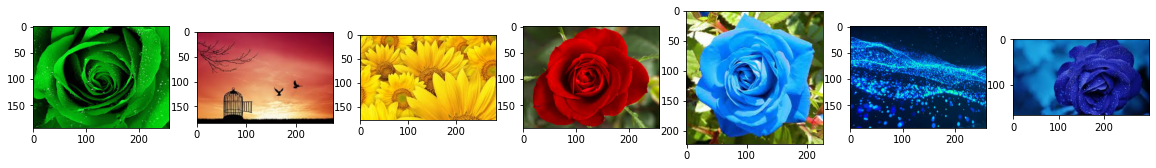

In [186]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [187]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [188]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

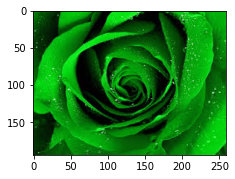

In [189]:
#this gives us a result of green images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

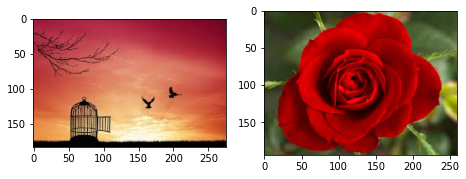

In [190]:
#this gives us a result of red images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

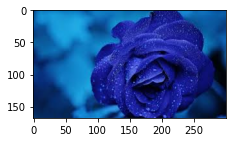

In [191]:
#this gives us a result of blue images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

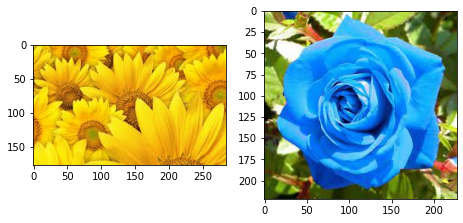

In [192]:
#this gives us a result of yellow images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

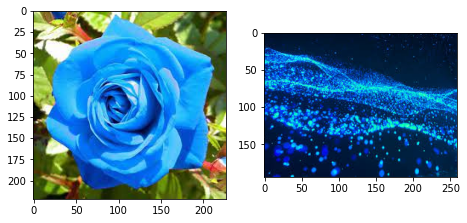

In [193]:
#this gives us a result of light blue images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['LIGHT BLUE'], 60, 5)